In [22]:
pip install pandas_datareader sklearn keras tensorflow matplotlib seaborn tqdm xgboost

You should consider upgrading via the 'c:\Users\Hiep\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [23]:
import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout, SimpleRNN
import os

In [24]:
from datetime import date, datetime, time, timedelta
import pandas_datareader as web 

main_company = 'BNB-USD'

start = datetime(2010, 1, 1)

df = web.DataReader(main_company, 'yahoo', start)
df['Date']=df.index

df=df.reset_index(drop=True)

In [25]:
# get the number of rows and columns in the data set
df.shape

(1700, 7)

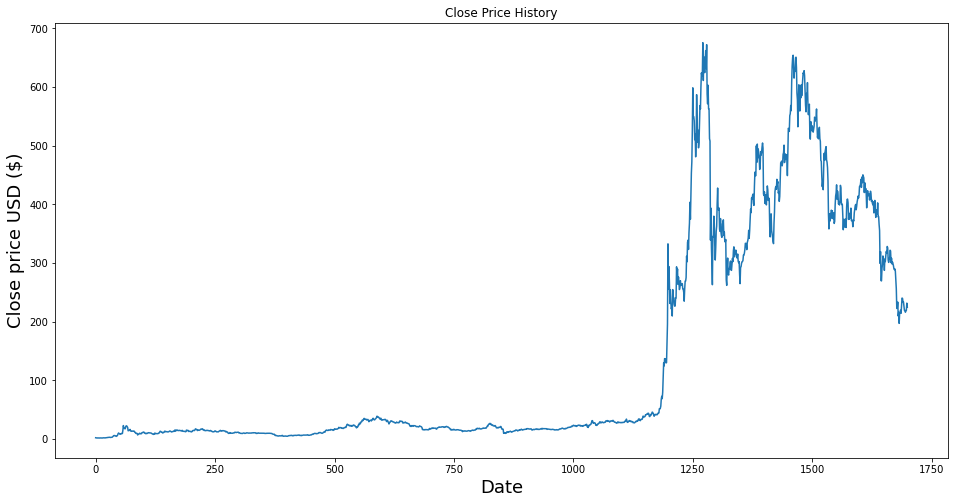

In [26]:
# visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD ($)', fontsize=18)
plt.show()

In [27]:
# create a new df with only the "close" column
data = df.filter({'Close'})
# convert the df to a numpy array
dataset = data.values
# get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

1360

In [28]:
# scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data


array([[7.12590782e-04],
       [4.24934910e-04],
       [2.37490711e-04],
       ...,
       [3.22572579e-01],
       [3.41252944e-01],
       [3.30682935e-01]])

In [29]:
## create the training data set
# create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
# split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

print(x_train)
print(y_train)

[array([7.12590782e-04, 4.24934910e-04, 2.37490711e-04, 1.38392138e-05,
       2.61445958e-04, 1.21956635e-04, 2.97994171e-05, 1.00211496e-04,
       0.00000000e+00, 2.43216234e-04, 1.53387773e-04, 1.69229328e-04,
       9.44859739e-05, 1.50391510e-04, 5.68695742e-05, 3.07561699e-04,
       5.39193387e-04, 5.08429755e-04, 6.41704110e-04, 6.03331086e-04,
       3.57726860e-04, 7.21787336e-04, 8.30453615e-04, 8.51116067e-04,
       1.06336108e-03, 1.45558907e-03, 1.60928841e-03, 1.59800075e-03,
       1.88317916e-03, 1.95841231e-03, 1.63173076e-03, 1.44326311e-03,
       1.77445364e-03, 1.74196952e-03, 1.88043522e-03, 2.44503751e-03,
       3.68716539e-03, 4.67874949e-03, 6.29861403e-03, 6.08966181e-03,
       6.35143383e-03, 5.43754496e-03, 5.44318136e-03, 4.19148667e-03,
       4.93774822e-03, 5.59992134e-03, 7.49013168e-03, 1.11530006e-02,
       1.27513726e-02, 1.15861089e-02, 1.08239758e-02, 9.39023561e-03,
       1.05688190e-02, 1.02410546e-02, 1.08687275e-02, 1.19042315e-02,
     

In [30]:
# convert the x_train and y_train to number arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [31]:
# reshape the data, input [samples, time steps, features] which is require for LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1300, 60, 1)

In [32]:
# build the SimpleRNN model
model = Sequential()
model.add(SimpleRNN(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(SimpleRNN(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [33]:
# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [34]:
# train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)
# model.save('../out/APPL_LSTM_1.h5')

1300/1300 [==============================] - 13s 9ms/step - loss: 0.0053


In [35]:
## create the testing data set
# create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60:, :]
# create the data sets x_test nad y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [36]:
# convert the data to a numpy array
x_test = np.array(x_test)

In [37]:
# reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [38]:
# get the models predicted price values
# model = load_model('../out/APPL_LSTM_1.h5')
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
print(predictions)


11/11 [==============================] - 0s 4ms/step
[[306.41608]
 [307.02878]
 [332.4804 ]
 [330.9076 ]
 [317.9615 ]
 [309.27658]
 [310.41016]
 [324.87344]
 [342.93094]
 [320.3176 ]
 [323.3192 ]
 [337.46375]
 [356.56958]
 [363.69904]
 [367.52173]
 [374.10312]
 [388.597  ]
 [388.09512]
 [382.79105]
 [373.53976]
 [384.21393]
 [412.60178]
 [438.7392 ]
 [420.44324]
 [430.9161 ]
 [436.4607 ]
 [450.27863]
 [442.6983 ]
 [447.46167]
 [456.4307 ]
 [438.57437]
 [451.29474]
 [432.43103]
 [430.42737]
 [435.70688]
 [444.30377]
 [445.68997]
 [436.2412 ]
 [451.73764]
 [393.42615]
 [370.7209 ]
 [378.9911 ]
 [369.63803]
 [399.36862]
 [368.15628]
 [370.80014]
 [353.1725 ]
 [366.23062]
 [371.77954]
 [356.92822]
 [347.78595]
 [364.19775]
 [378.4055 ]
 [331.93423]
 [337.50037]
 [363.46613]
 [352.36386]
 [324.18805]
 [311.24265]
 [301.17123]
 [292.59845]
 [310.8316 ]
 [330.98676]
 [368.57452]
 [385.45917]
 [412.24326]
 [402.42816]
 [389.56906]
 [417.761  ]
 [413.27917]
 [401.10666]
 [407.5836 ]
 [403.50266

In [39]:
# get the rmse (root mean squared error)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

37.383400950712314

C:\Users\Hiep\AppData\Local\Temp\ipykernel_23360\3363781652.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = predictions


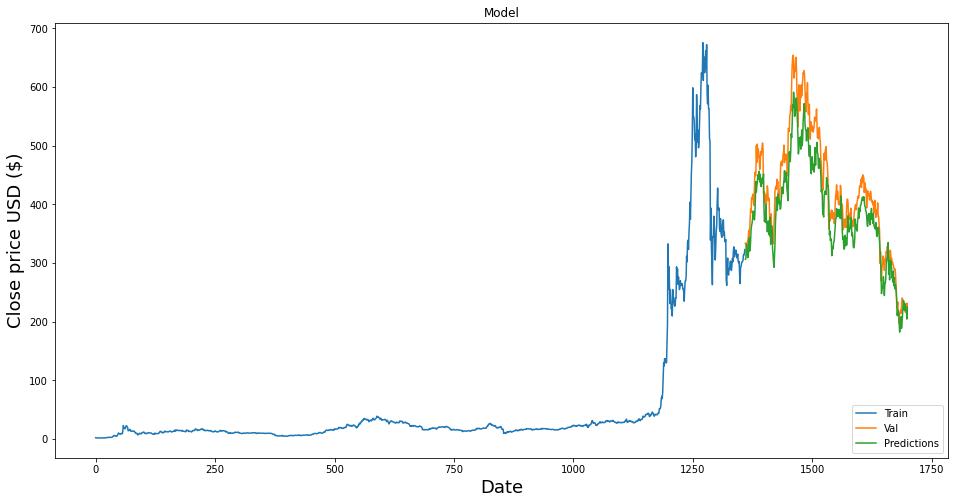

In [40]:
# plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Prediction'] = predictions
# visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [41]:
# show the valid and predicted prices
valid

,Close,Prediction
1360,333.549591,306.416077
1361,333.484009,307.028778
1362,331.103119,332.480408
1363,322.747742,330.907593
1364,334.918793,317.961487
...,...,...
1695,216.015457,223.421616
1696,218.035233,219.140564
1697,218.980316,221.713181
1698,231.574127,204.390213


In [42]:
valid.index=pd.to_datetime(df['Date'].loc[training_data_len:].copy())
valid.to_csv('../out/SimpleRNN/BNB-USD.csv')
valid

,Close,Prediction
Date,,
2021-07-31,333.549591,306.416077
2021-08-01,333.484009,307.028778
2021-08-02,331.103119,332.480408
2021-08-03,322.747742,330.907593
2021-08-04,334.918793,317.961487
...,...,...
2022-07-01,216.015457,223.421616
2022-07-02,218.035233,219.140564
2022-07-03,218.980316,221.713181
